### Imports 

In [1]:
# import libraries
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
# import scikit learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

### Loading the Dataset

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### Data Information

In [5]:
df.shape

(569, 33)

### More Information on the Dataset

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Pearson Correlation

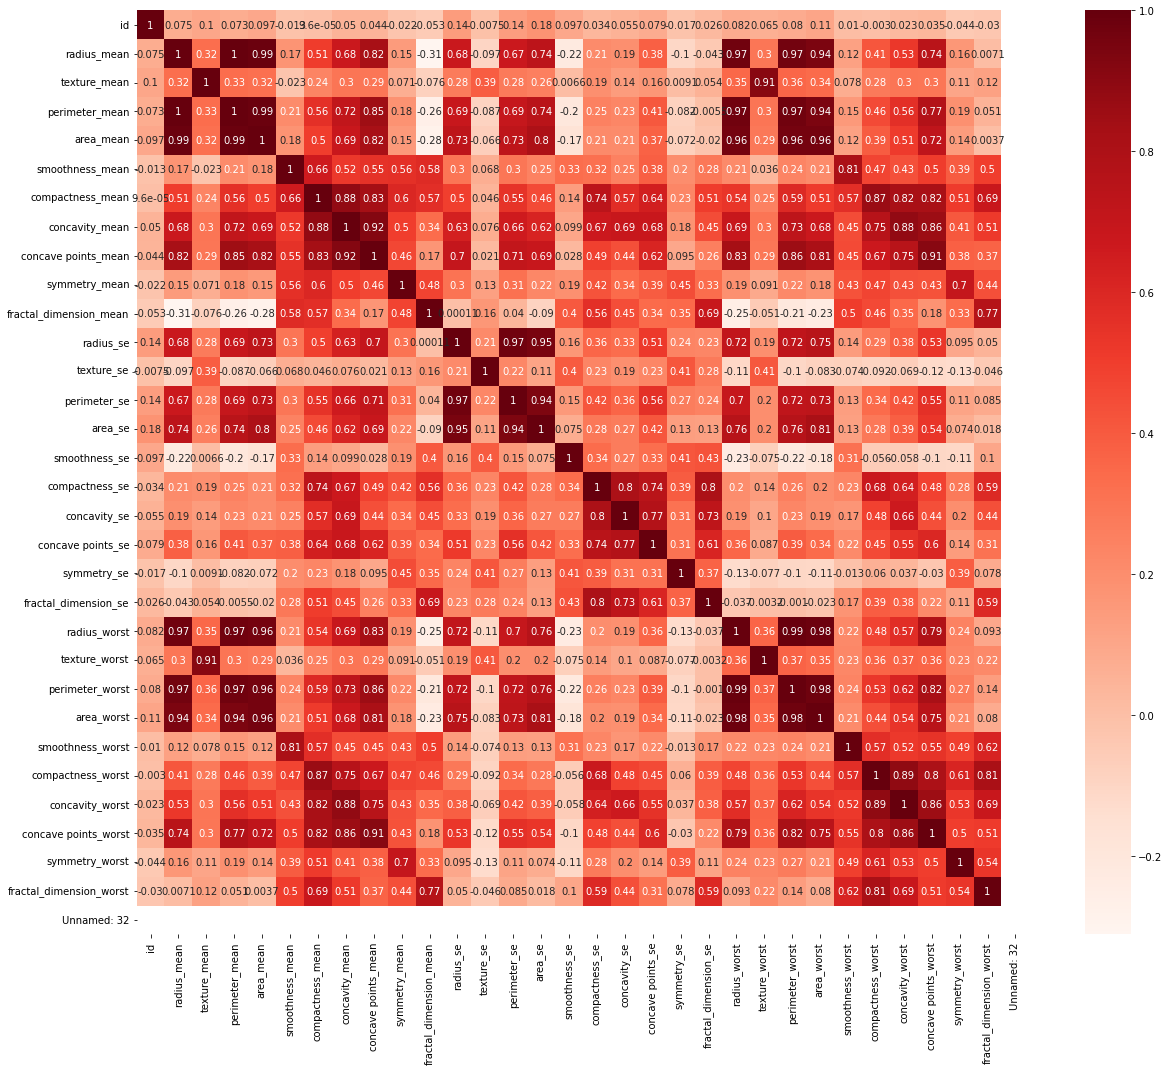

In [9]:
plt.figure(figsize=(20,17))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

C:\Users\15128\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of radius_mean')

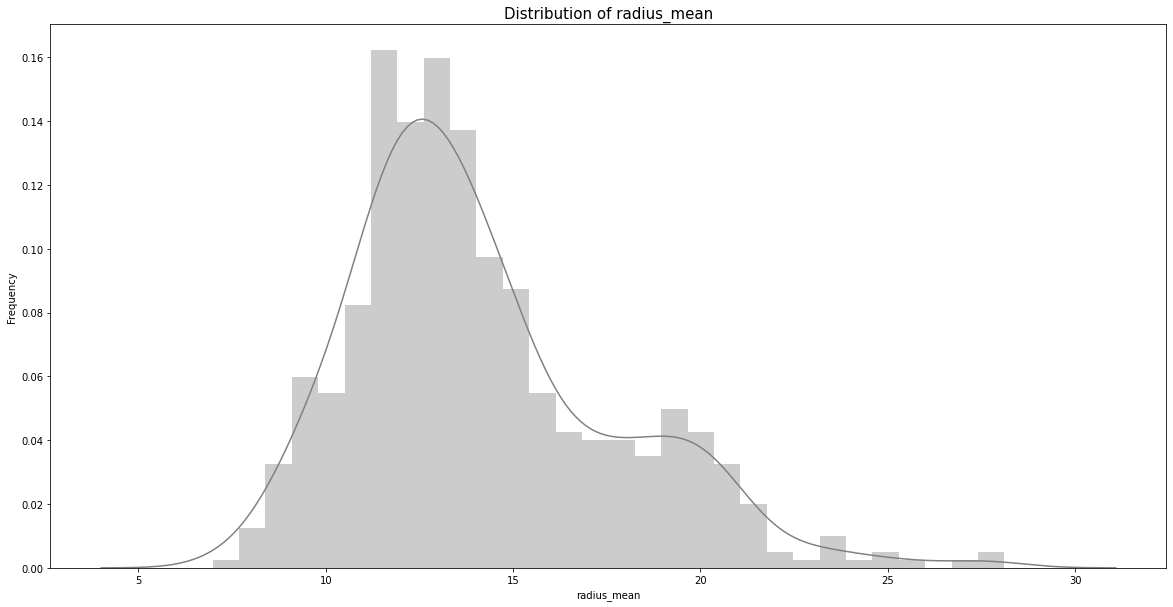

In [10]:
plt.figure(figsize=(20,10))
sns.distplot(df['radius_mean'], hist=True, bins=30, color='grey')
plt.xlabel('radius_mean')
plt.ylabel('Frequency')
plt.title('Distribution of radius_mean', fontsize=15)

C:\Users\15128\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of concavity_mean')

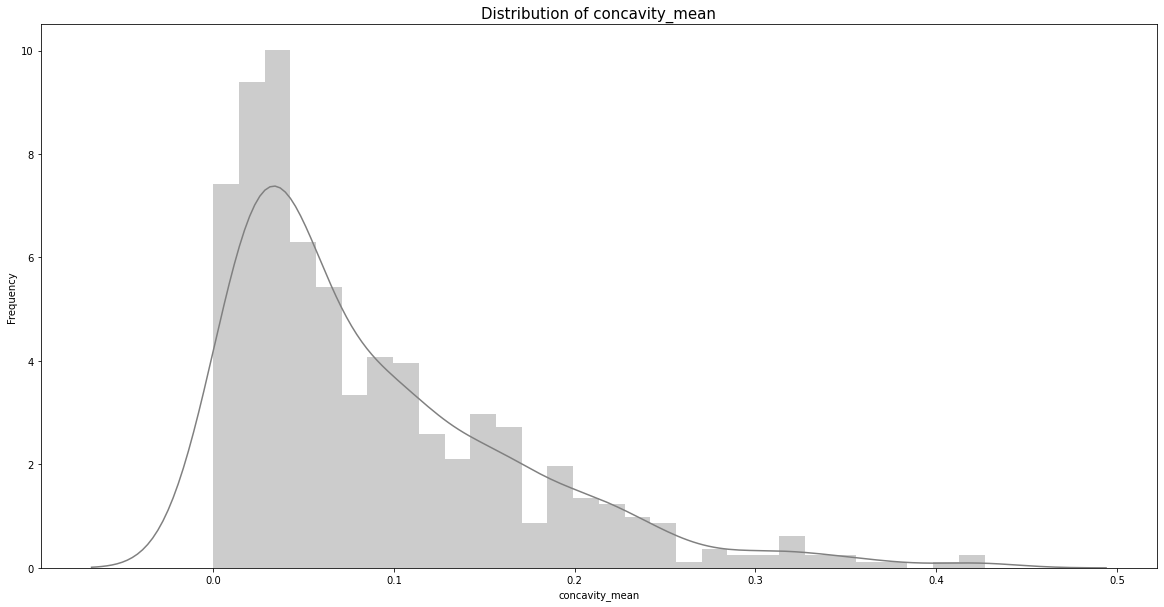

In [11]:
plt.figure(figsize=(20,10))
sns.distplot(df['concavity_mean'], hist=True, bins=30, color='grey')
plt.xlabel('concavity_mean')
plt.ylabel('Frequency')
plt.title('Distribution of concavity_mean', fontsize=15)

### Clean Data

In [12]:
df.drop('id', axis=1, inplace=True)# didnt use
df.drop('Unnamed: 32', axis=1, inplace=True)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
print(len(df.columns))

31


### Benign and Malignant Inspection

In [15]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Benign:  357
Malignant:  212


C:\Users\15128\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

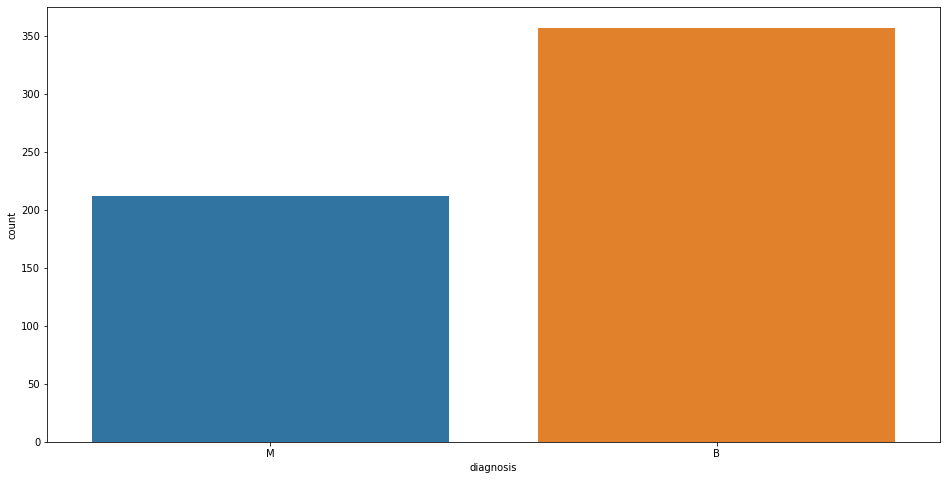

In [16]:
b,m = df['diagnosis'].value_counts()
print("Benign: ", b)
print("Malignant: ", m)

plt.figure(figsize = (16,8))
sns.countplot(df['diagnosis'])

### Creating Target/Feature Variable and Spliting Data into Train/Test sets

In [17]:
y = df['diagnosis'].values #Target 
X = df.drop('diagnosis', axis=1).values #Feature 

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 100)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


### Normalization

In [19]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

### Support Vector Machine (SVM)

In [20]:
# create a model
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

In [21]:
# parameters getting tune
parameter = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
              'kernel' :['linear', 'poly', 'rbf', 'sigmoid']} 

# fitting the model
gridSearch = GridSearchCV(model, parameter, cv=10) 
gridSearch.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                               2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
gridSearch.best_score_

0.9811738648947952

In [23]:
gridSearch.best_estimator_

SVC(C=1.3)

In [24]:
#After hyperparameter tuning
model = SVC(C = 0.1, kernel = 'linear')
model.fit(X_train_scaled, y_train)
y_pred_svc = model.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print("Accuracy (Test Data):",accuracy_svc)

Accuracy (Test Data): 0.958041958041958


In [25]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        87
           M       1.00      0.89      0.94        56

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



<AxesSubplot:>

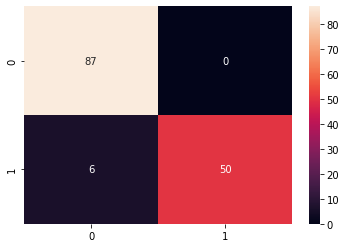

In [26]:
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)

### Logistic Regression

In [27]:
# create a model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# parameters getting tune
parameter = {'C':[0.001,0.01, 0.1, 0.2,0.3, 1,10,100,200]}
gridSearch = GridSearchCV(model, parameter, cv = 10)

# fitting the model
gridSearch.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3, 1, 10, 100, 200]})

In [29]:
gridSearch.best_score_

0.9811738648947952

In [30]:
gridSearch.best_estimator_

LogisticRegression(C=0.3, max_iter=1000)

In [31]:
#After hyperparameter tuning
model = LogisticRegression(C = 0.3)
model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy (Test Data):",accuracy_lr)

Accuracy (Test Data): 0.958041958041958


In [32]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        87
           M       1.00      0.89      0.94        56

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



<AxesSubplot:>

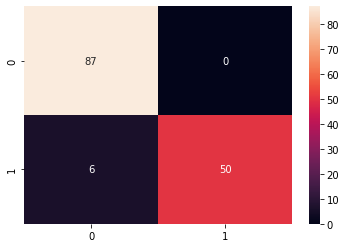

In [33]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True)

### Decision Tree 

In [34]:
# create a model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [35]:
# parameters getting tune
parameter = {'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
              'max_features': ['auto', 'sqrt', 'log2']}


# fitting the model
gridSearch = GridSearchCV(model, parameter, cv=10)
gridSearch.fit(X_train_scaled, y_train) # Model Fitting


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [36]:
gridSearch.best_score_

0.9482834994462902

In [37]:
gridSearch.best_estimator_

DecisionTreeClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=6)

In [38]:
#After hyperparameter tuning
model = DecisionTreeClassifier(max_features = 'auto', min_samples_leaf=5, min_samples_split=7)
model.fit(X_train_scaled, y_train)
y_pred_dt = model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print("Accuracy on Test Data:",accuracy_dt)

Accuracy on Test Data: 0.9230769230769231


In [39]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           B       0.90      0.99      0.94        87
           M       0.98      0.82      0.89        56

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



<AxesSubplot:>

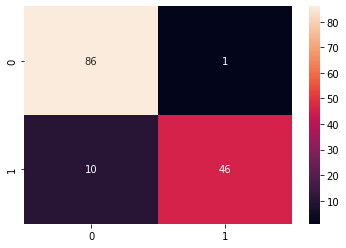

In [40]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True)

### K Nearest Neighbors(KNN)

In [49]:
# create a model
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [50]:
# parameters getting tune
parameter = {'n_neighbors': list(range(1, 30)),
              'leaf_size': list(range(1,30)),
              'weights': [ 'distance', 'uniform']} 

# fitting the model
gridSearch = GridSearchCV(model, parameter, cv=10) 
gridSearch.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['distance', 'uniform']})

In [51]:
gridSearch.best_score_

0.9718161683277963

In [52]:
gridSearch.best_estimator_k=3

In [53]:
#After hyperparameter tuning
model = KNeighborsClassifier(leaf_size =1, n_neighbors =  6, weights = 'distance')
model.fit(X_train_scaled, y_train)
y_pred_knn = model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy on Test Data:",accuracy_knn)

Accuracy on Test Data: 0.951048951048951


In [54]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        87
           M       1.00      0.88      0.93        56

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



<AxesSubplot:>

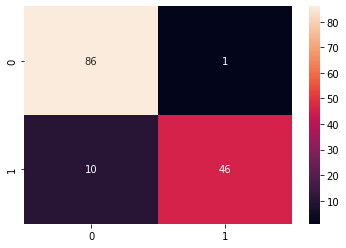

In [55]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True)